In [19]:
import networkx as nx
import os
import glob
import matplotlib.pyplot as plt

In [10]:
article = 'Meisen'

In [51]:
path = r'c:\Users\Marvin\PycharmProjects\pythonProject/real stuff/datafiles/' + article + '/backlinksdata'
extension = 'csv'
os.chdir(path)
result = glob.glob('*.{}'.format(extension))
cropped_result = [r[0:-4] for r in result]
print(cropped_result)

['Aegithalos', 'Alter Friedhof (Gießen)', 'Amsel', 'Apodaca Provincial Park', 'Appetenzverhalten', 'Arten des Anhangs I der Vogelschutzrichtlinie der EU', 'Bartkauz', 'Bartmeise', 'Baumhopfe', 'Bergkohlmeise', 'Beth Slikas', 'Beutelmeisen', 'Blaumeise', 'Blochinger Sandwinkel', 'Borodino-Buntmeise', 'Braunbürzelspecht', 'Brauner Bär (Schmetterling)', 'Buchsbaumzünsler', 'Buntmeise', 'Buntspecht', 'Burckhardtshöhe', 'Bylerward', 'Chibinen', 'Christopher M. Perrins', 'Cyanistes', 'Deutschland', 'Dommelspecht', 'Dunenspecht', 'Es rappelt im Karton', 'Europa- und Naturschutzgebiet Gerzkopf', 'Federsee', 'Fichtenmeise', 'Geographie der Vereinigten Staaten', 'Geographie Deutschlands', 'Gleispark Frintrop', 'Goldhähnchen-Laubsänger', 'Gordon Bay Provincial Park', 'Groß Zicker', 'Grüner Tropfenastrild', 'Gutshaus Friedenfelde', 'Handbook of the Birds of the World', 'Handschwinge', 'Hanko-Halbinsel', 'Hans Löhrl', 'Hartenstein (Mittelfranken)', 'Haubenmeise', 'Haussperling', 'Hellwinkel', 'Henr

In [44]:
G = nx.Graph()
G.add_nodes_from(cropped_result)
G.add_node(article)

In [45]:
G.add_edges_from([(r,article) for r in cropped_result])

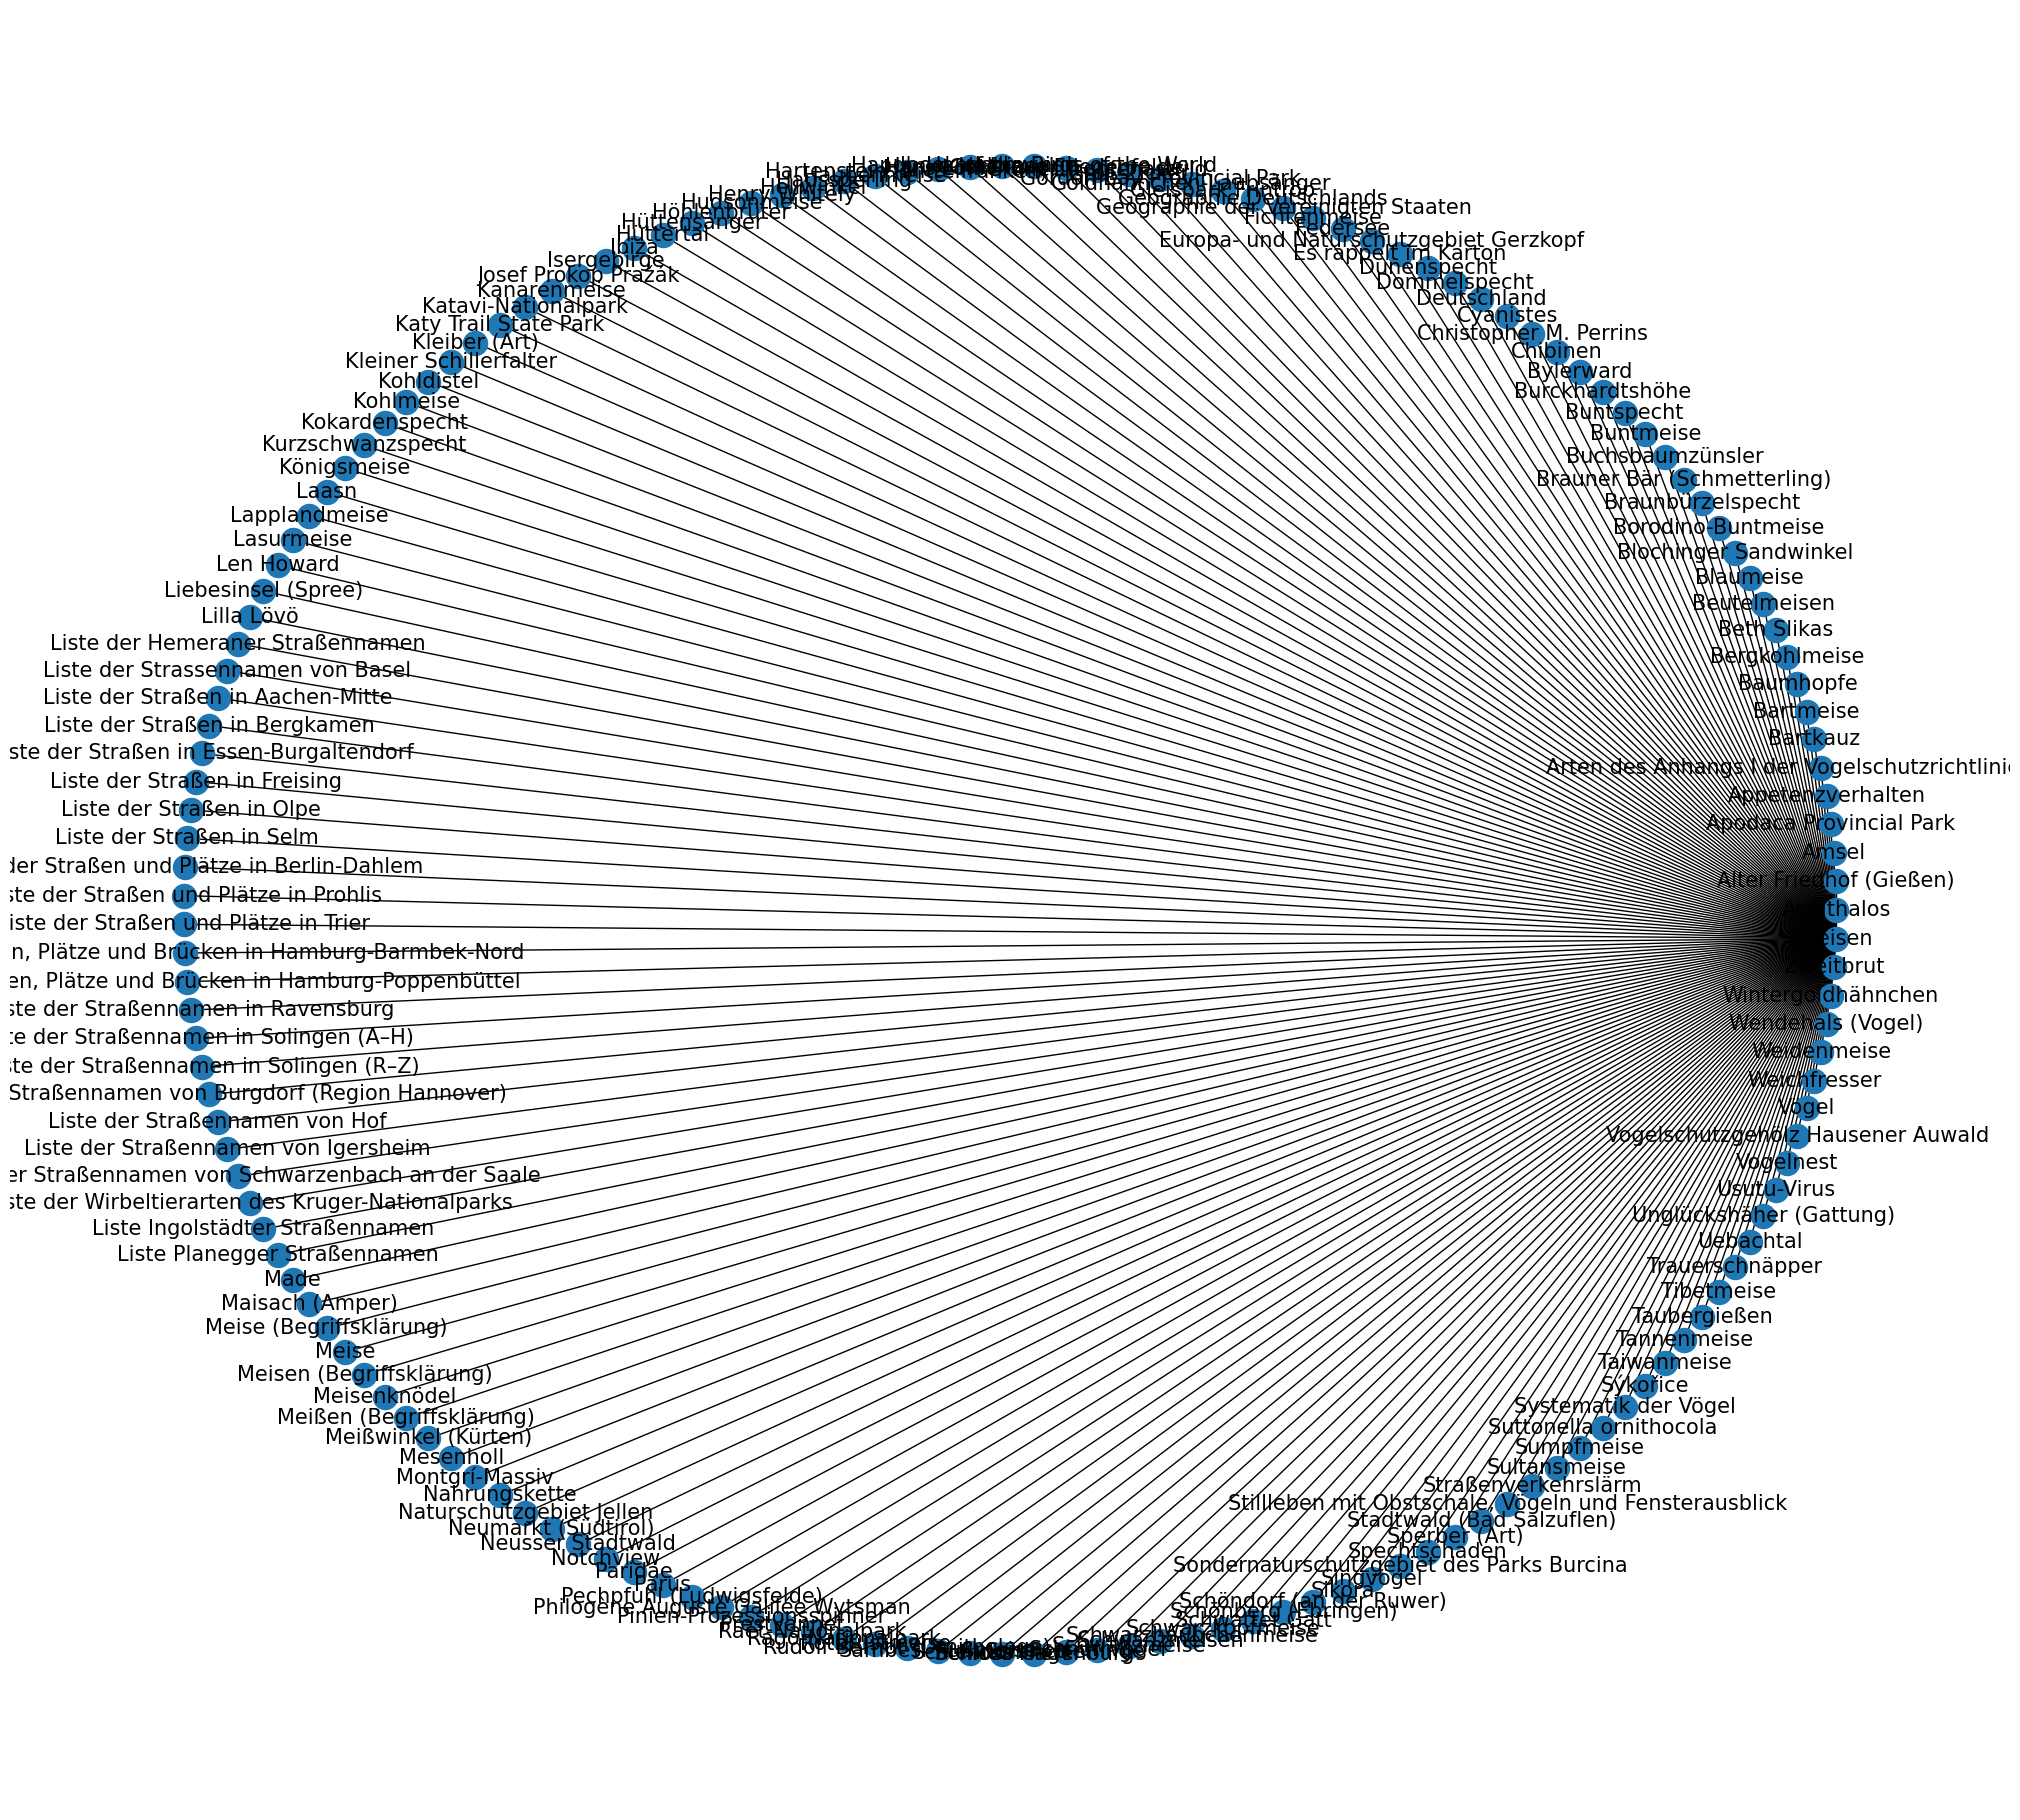

In [57]:
plt.rcParams["figure.figsize"] = (20,18)
nx.draw(G, with_labels=True, font_size=15, pos=nx.circular_layout(G))
plt.show()

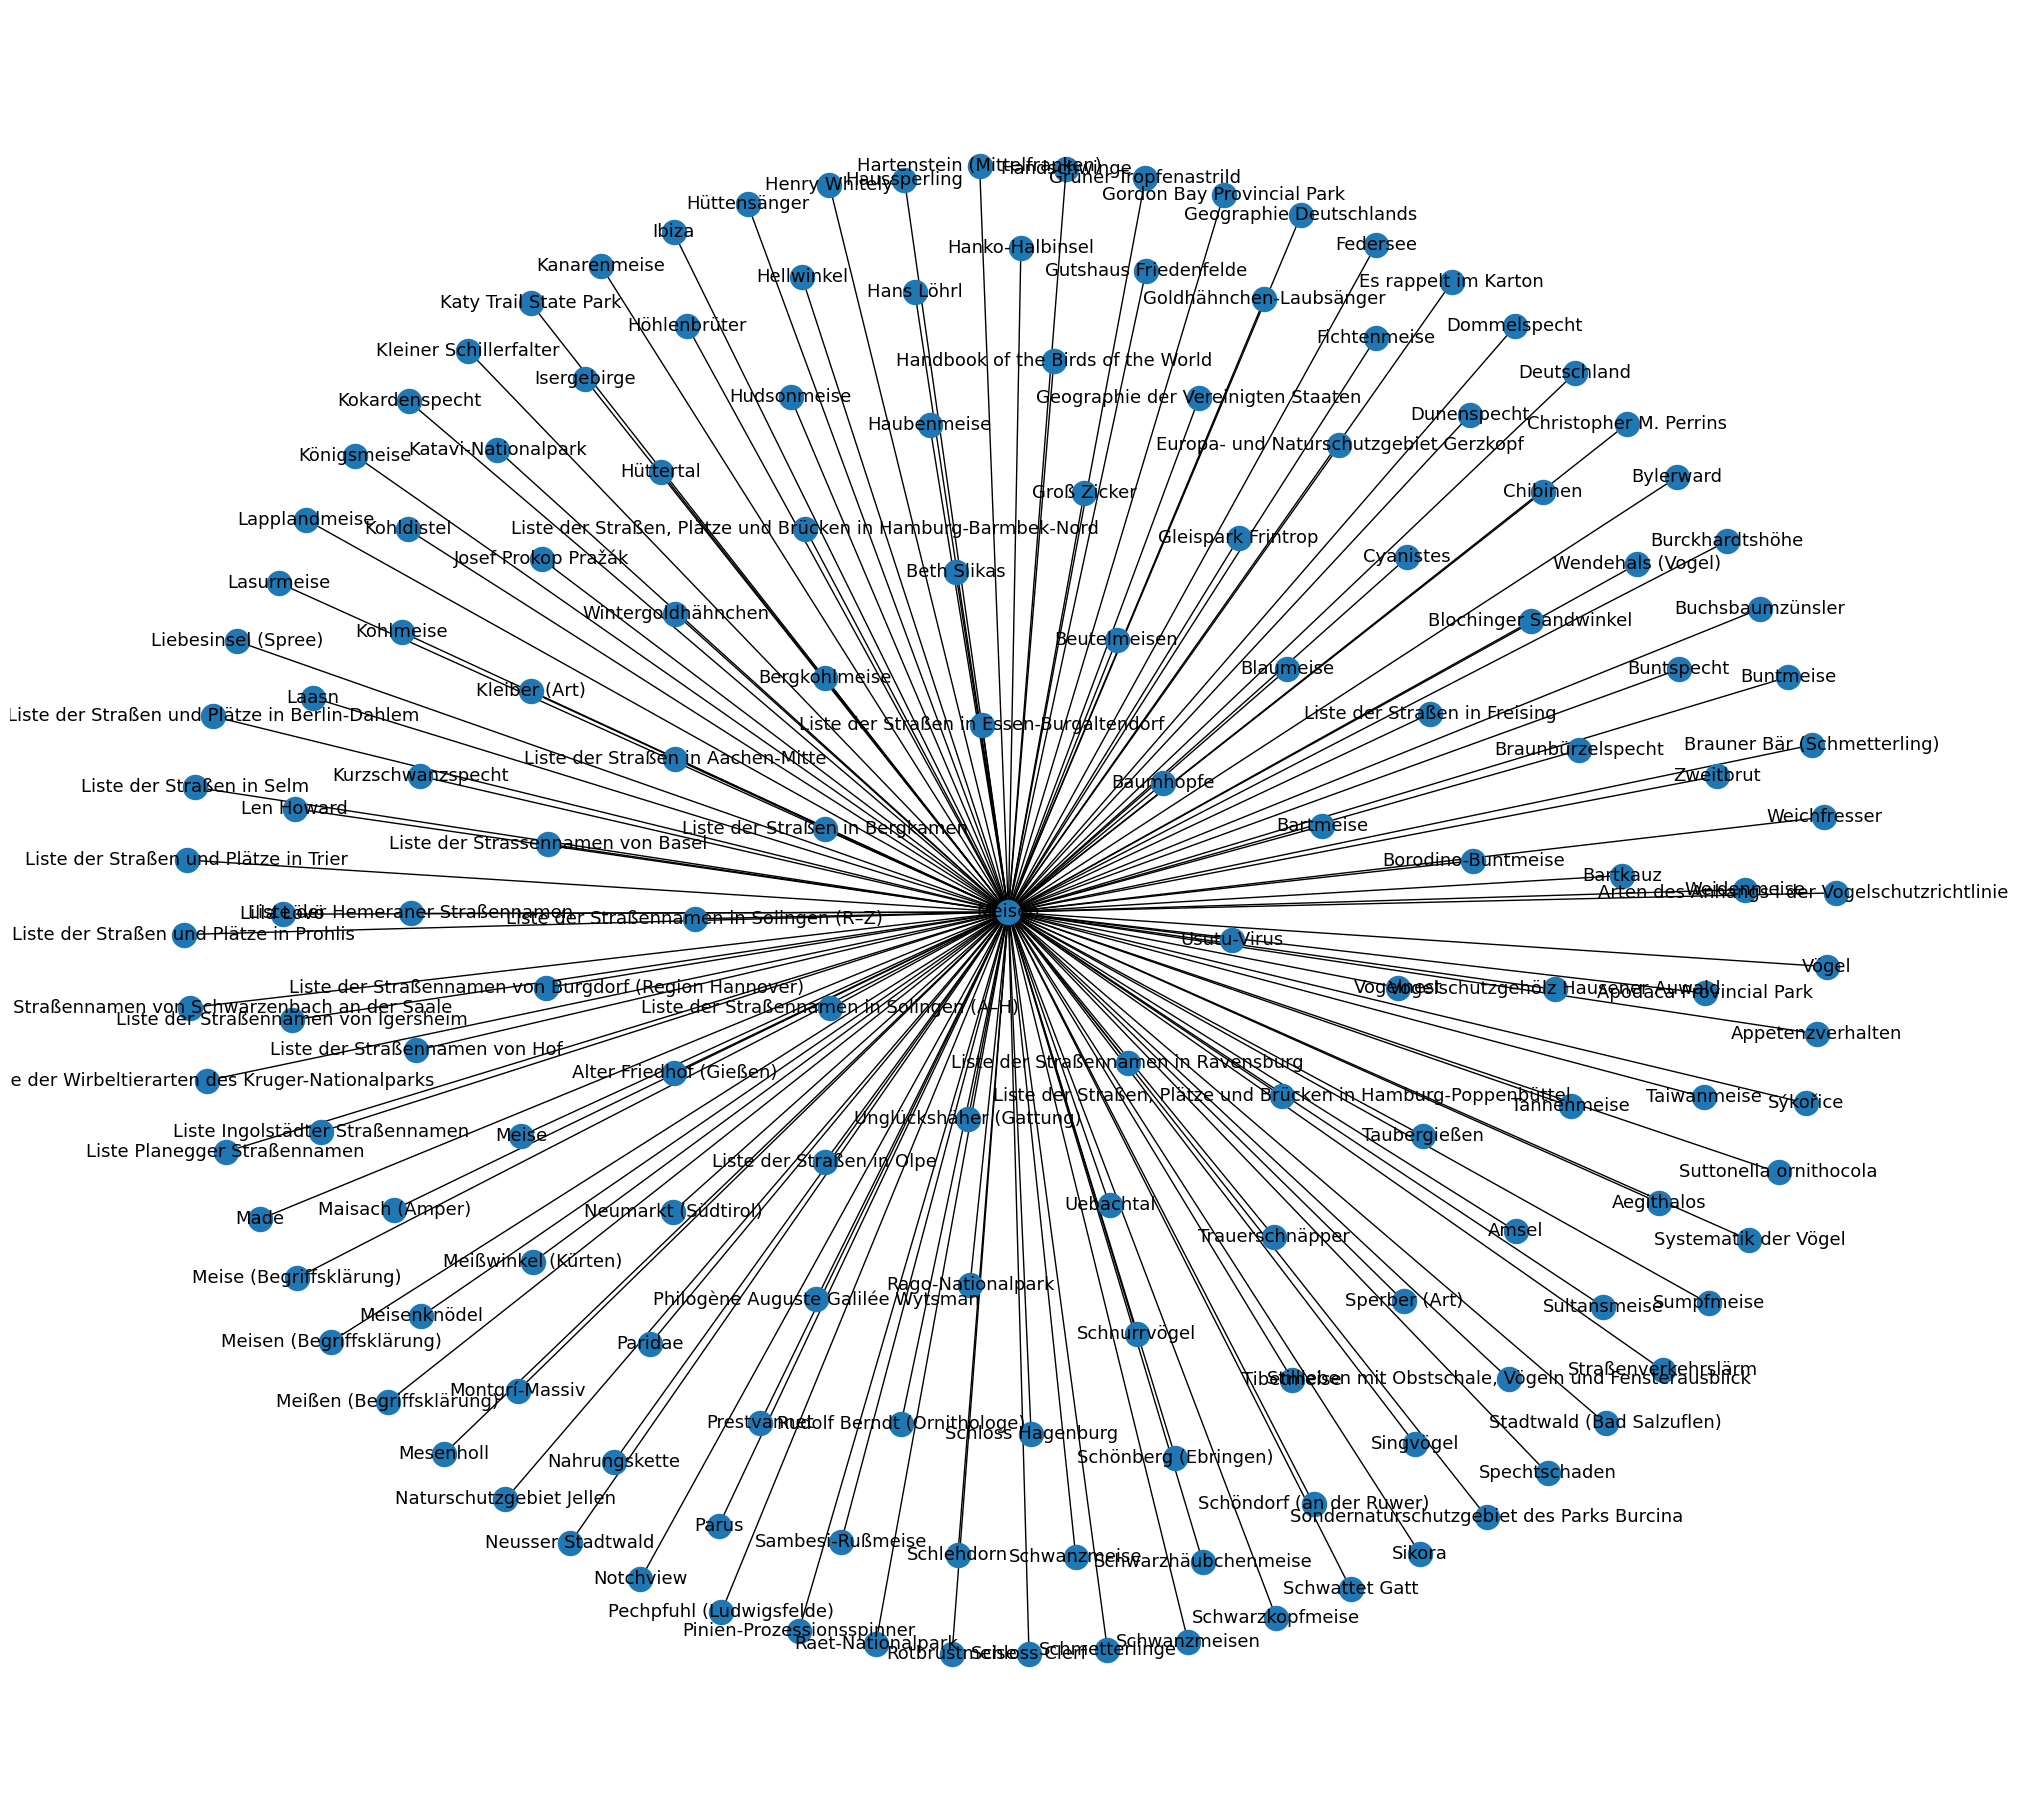

In [77]:
nx.draw(G, with_labels=True, font_size=13, pos=nx.kamada_kawai_layout(G))
plt.show()

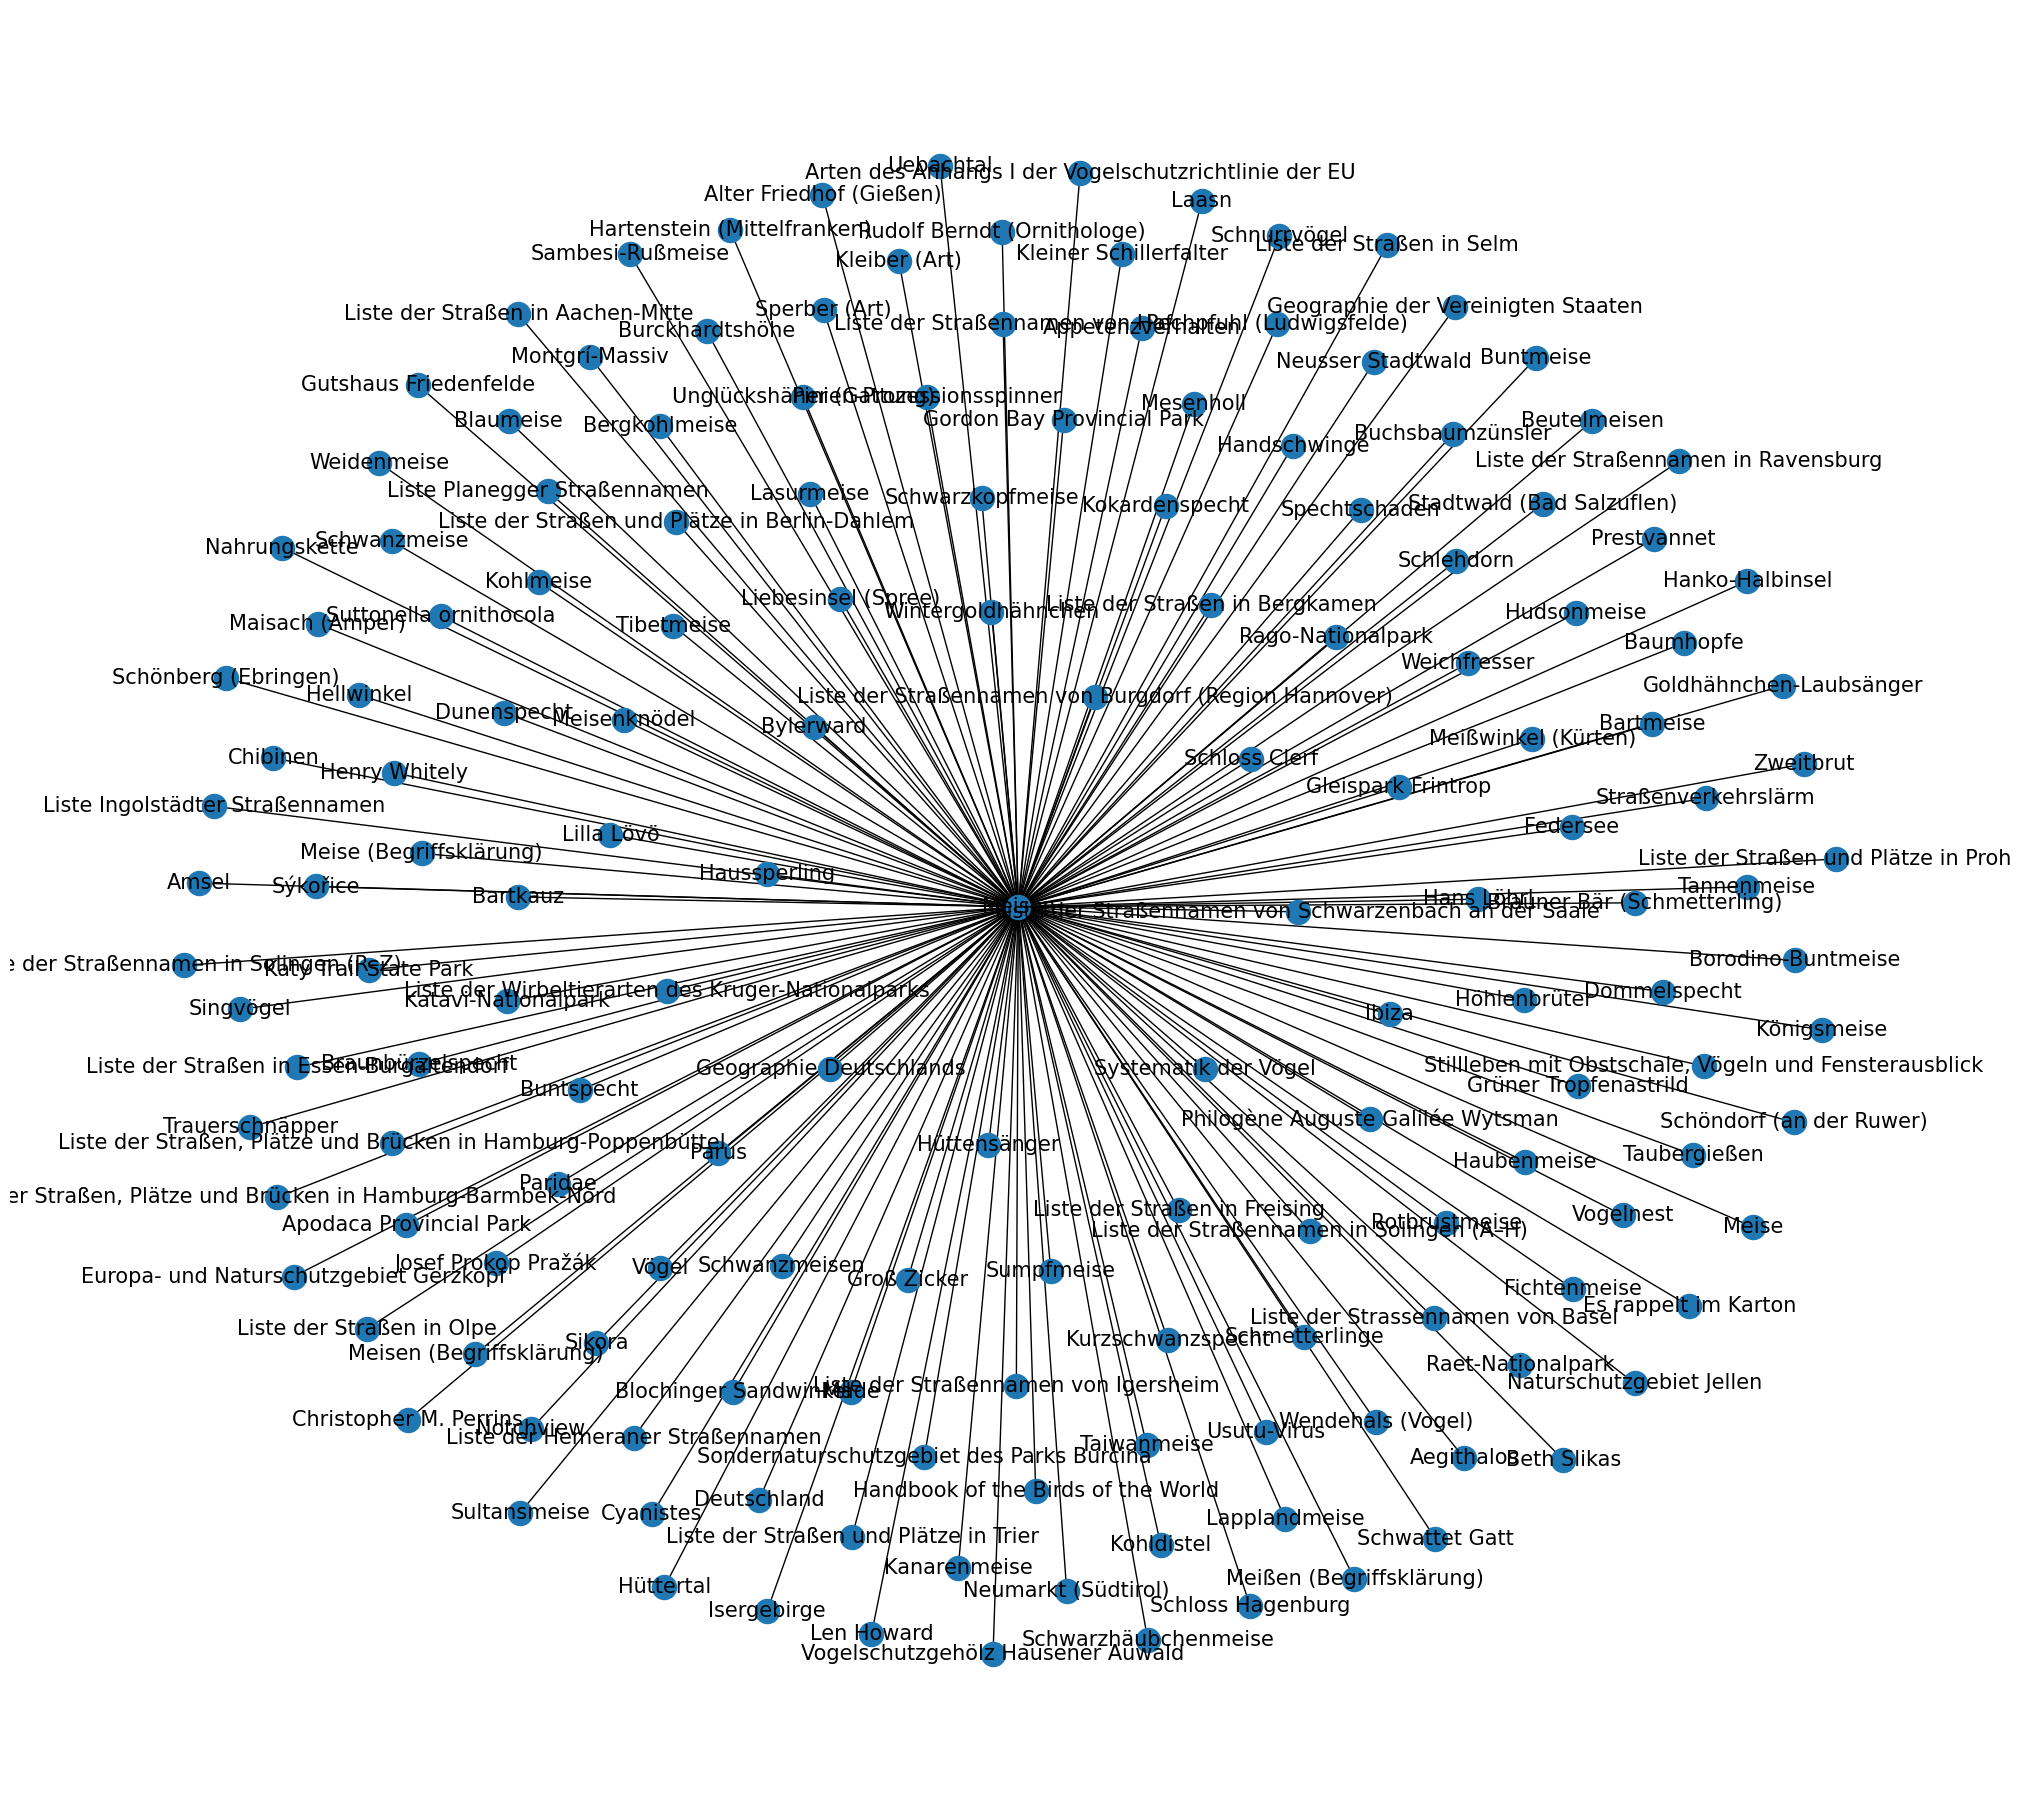

In [79]:
nx.draw(G, with_labels=True, font_size=15, pos=nx.fruchterman_reingold_layout(G))
plt.show()

In [85]:
from linkmethods import get_target, get_backlink_views
import numpy as np

In [102]:
mean_views = list(np.array(get_backlink_views("Meisen", get_target("Meisen"))).mean(axis=1))

In [103]:
len(cropped_result)

162

In [115]:
source = [i for i in range(len(cropped_result))]
target = [len(source)]*len(source)
value = mean_views
print(np.shape(source))
print(source)
print(np.shape(target))
print(target)
print(np.shape(value))
print(value)

(162,)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161]
(162,)
[162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162,

In [96]:
import plotly.graph_objects as go

In [121]:

link = dict(source=source, target= target, value= value)
data = go.Sankey(link=link)
#fig = go.Figure(data)
fig = go.Figure(data=[go.Sankey(
    node= dict(
        pad = 15,
        thickness=15,
        label=cropped_result
    ),
    link= dict(
        source=source,
        target=target,
        value=value
    )
)])
fig.update_layout(title_text="", font_size=10, width=2000, height=2000)
fig.show()

In [124]:
fig.write_html(r"C:\Users\Marvin\Desktop\sankey.html")